In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import json
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_excel("T20_Match_Details.xlsx")

In [3]:
df

Unnamed: 0  Unnamed: 0.1        Team 1       Team 2        Winner  \
0             0             0  South Africa  West Indies   West Indies   
1             1             1  South Africa  West Indies   West Indies   
2             2             2  South Africa  West Indies  South Africa   
3             3             3    Bangladesh     Pakistan    Bangladesh   
4             4             4      Pakistan     Zimbabwe      Pakistan   
..          ...           ...           ...          ...           ...   
702         702            90     Australia        India         India   
703         703            91     Australia        India     Australia   
704         704            92   New Zealand     Pakistan   New Zealand   
705         705            93   New Zealand     Pakistan   New Zealand   
706         706            94   New Zealand     Pakistan      Pakistan   

        Margin        Ground    Match Date  \
0    4 wickets     Cape Town   Jan 9, 2015   
1    4 wickets  Johannesburg  Jan 11, 2015   
2      69 runs        Durban  Jan 14, 2015   
3    7 wickets        Mirpur  Apr 24, 2015   
4    5 wickets        Lahore  May 22, 2015   
..         ...           ...           ...   
702  6 wickets        Sydney   Dec 6, 2020   
703    12 runs        Sydney   Dec 8, 2020   
704  5 wickets      Auckland  Dec 18, 2020   
705  9 wickets      Hamilton  Dec 20, 2020   
706  4 wickets        Napier  Dec 22, 2020   

                                             Scorecard  \
0    https://stats.espncricinfo.com/ci/engine/match...   
1    https://stats.espncricinfo.com/ci/engine/match...   
2    https://stats.espncricinfo.com/ci/engine/match...   
3    https://stats.espncricinfo.com/ci/engine/match...   
4    https://stats.espncricinfo.com/ci/engine/match...   
..                                                 ...   
702  https://stats.espncricinfo.com/ci/engine/match...   
703  https://stats.espncricinfo.com/ci/engine/match...   
704  https://stats.espncricinfo.com/ci/engine/match...   
705  https://stats.espncricinfo.com/ci/engine/match...   
706  https://stats.espncricinfo.com/ci/engine/match...   

                                    Toss   Target  \
0     South Africa, elected to bat first  ['166']   
1    West Indies, elected to field first  ['232']   
2    West Indies, elected to field first  ['196']   
3         Pakistan, elected to bat first  ['142']   
4         Zimbabwe, elected to bat first  ['173']   
..                                   ...      ...   
702        India, elected to field first  ['195']   
703        India, elected to field first  ['187']   
704       Pakistan, elected to bat first  ['154']   
705       Pakistan, elected to bat first  ['164']   
706     Pakistan, elected to field first  ['174']   

                                         Total_Players  \
0    ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...   
1    ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...   
2    ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...   
3    ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...   
4    ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...   
..                                                 ...   
702  ['Matthew Wade', "D'Arcy Short", 'Steven Smith...   
703  ['Matthew Wade', 'Aaron Finch', 'Steven Smith'...   
704  ['Mohammad Rizwan', 'Abdullah Shafique', 'Haid...   
705  ['Mohammad Rizwan', 'Haider Ali', 'Abdullah Sh...   
706  ['Martin Guptill', 'Tim Seifert', 'Kane Willia...   

                                    batting_first_team  \
0    {'Morne van Wyk', 'Faf du Plessis', 'David Mil...   
1    {'Marchant de Lange', 'Morne van Wyk', 'Faf du...   
2    {'Marchant de Lange', 'Morne van Wyk', 'David ...   
3    {'Umar Gul', 'Wahab Riaz', 'Ahmed Shehzad', 'S...   
4    {'Sean Williams', 'Sikandar Raza', 'Chris Mpof...   
..                                                 ...   
702  {'Andrew Tye', 'Glenn Maxwell', 'Daniel Sams',...   
703  {'Andrew Tye', 'Glenn Maxwell', 'Daniel Sams',...   
704  {'Fah

In [4]:
df = df.rename(columns={"Team 1": "Team_1", "Team 2": "Team_2"})

In [5]:
df.query("(Team_1 == 'Afghanistan' or Team_2 == 'Afghanistan') and Winner == 'Afghanistan'").count()

Unnamed: 0             43
Unnamed: 0.1           43
Team_1                 43
Team_2                 43
Winner                 43
Margin                 43
Ground                 43
Match Date             43
Scorecard              43
Toss                   43
Target                 43
Total_Players          43
batting_first_team     43
batting_second_team    43
dtype: int64

In [6]:
df[df['Ground'] == 'Perth']

Unnamed: 0  Unnamed: 0.1     Team_1    Team_2     Winner      Margin  \
596         596           291  Australia  Pakistan  Australia  10 wickets   

    Ground   Match Date                                          Scorecard  \
596  Perth  Nov 8, 2019  https://stats.espncricinfo.com/ci/engine/match...   

                                  Toss   Target  \
596  Australia, elected to field first  ['107']   

                                         Total_Players  \
596  ['Imam-ul-Haq', 'Babar Azam', 'Mohammad Rizwan...   

                                    batting_first_team  \
596  {'Mohammad Hasnain', 'Mohammad Amir', 'Mohamma...   

                                   batting_second_team  
596  {'Kane Richardson', 'Ashton Agar', 'David Warn...

In [7]:
df['Toss'] = df['Toss'].str.extract('(.+?),')

In [8]:
df.query("(Team_1 == 'South Africa' or Team_2 == 'South Africa') and Winner == 'South Africa' and Toss == 'South Africa'").count()

Unnamed: 0             13
Unnamed: 0.1           13
Team_1                 13
Team_2                 13
Winner                 13
Margin                 13
Ground                 13
Match Date             13
Scorecard              13
Toss                   13
Target                 13
Total_Players          13
batting_first_team     12
batting_second_team    12
dtype: int64

In [9]:
import seaborn as sns

In [10]:
def histplot_total_matches_won_matches(Team:str):
    total_matches = df.query("Team_1 == " + "'" + Team + "'" + " or Team_2 == " + "'" + Team + "'")['Team_1'].count()
    won_matches = df.query("(Team_1 == " + "'" + Team + "'" + " or Team_2 == " + "'" + Team + "'" + ") and Winner == " + "'" + Team + "'")['Team_1'].count()
    print(total_matches,won_matches)
    plt.bar(str(total_matches),height= won_matches)
    return plt

84 55


<module 'matplotlib.pyplot' from 'C:\\Users\\noahr\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

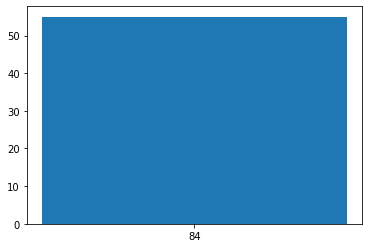

In [11]:
histplot_total_matches_won_matches('India')

In [13]:
Team = 'India'

In [14]:
df.query("Team_1 == " + "'" + Team + "'" + " or Team_2 == " + "'" + Team + "'")['Team_1'].count()

84

In [15]:
s = "(Team_1 == " + "'" + Team + "'" + " or Team_2 == " + "'" + Team + "'" + ") and Winner == " + "'" + Team + "'"

In [16]:
df.query("(Team_1 == " + "'" + Team + "'" + " or Team_2 == " + "'" + Team + "'" + ") and Winner == " + "'" + Team + "'").count()

Unnamed: 0             55
Unnamed: 0.1           55
Team_1                 55
Team_2                 55
Winner                 55
Margin                 55
Ground                 55
Match Date             55
Scorecard              55
Toss                   54
Target                 55
Total_Players          55
batting_first_team     55
batting_second_team    55
dtype: int64

In [17]:
df[(df['Team_1'] == "India") | (df['Team_2'] == "India")]["Team_1"].count()
df["Winner"]=="India"

0      False
1      False
2      False
3      False
4      False
       ...  
702     True
703    False
704    False
705    False
706    False
Name: Winner, Length: 707, dtype: bool

In [18]:
df[df["Winner"]=="India"]["Winner"].count()

55

In [21]:
#cleaning

In [22]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re


In [4]:
df = pd.read_excel("T20_Match_Details.xlsx")

In [5]:
df['Toss'] = df['Toss'].str.extract('(.+?),')

In [6]:
df.Target = df.Target.str.extract('(\d+)')

In [ ]:
for i in range(707):
    df.Total_Players[i] = re.sub("View full profile of ","",df.Total_Players[i])

In [8]:
df

Unnamed: 0  Unnamed: 0.1        Team 1       Team 2        Winner  \
0             0             0  South Africa  West Indies   West Indies   
1             1             1  South Africa  West Indies   West Indies   
2             2             2  South Africa  West Indies  South Africa   
3             3             3    Bangladesh     Pakistan    Bangladesh   
4             4             4      Pakistan     Zimbabwe      Pakistan   
..          ...           ...           ...          ...           ...   
702         702            90     Australia        India         India   
703         703            91     Australia        India     Australia   
704         704            92   New Zealand     Pakistan   New Zealand   
705         705            93   New Zealand     Pakistan   New Zealand   
706         706            94   New Zealand     Pakistan      Pakistan   

        Margin        Ground    Match Date  \
0    4 wickets     Cape Town   Jan 9, 2015   
1    4 wickets  Johannesburg  Jan 11, 2015   
2      69 runs        Durban  Jan 14, 2015   
3    7 wickets        Mirpur  Apr 24, 2015   
4    5 wickets        Lahore  May 22, 2015   
..         ...           ...           ...   
702  6 wickets        Sydney   Dec 6, 2020   
703    12 runs        Sydney   Dec 8, 2020   
704  5 wickets      Auckland  Dec 18, 2020   
705  9 wickets      Hamilton  Dec 20, 2020   
706  4 wickets        Napier  Dec 22, 2020   

                                             Scorecard          Toss Target  \
0    https://stats.espncricinfo.com/ci/engine/match...  South Africa    166   
1    https://stats.espncricinfo.com/ci/engine/match...   West Indies    232   
2    https://stats.espncricinfo.com/ci/engine/match...   West Indies    196   
3    https://stats.espncricinfo.com/ci/engine/match...      Pakistan    142   
4    https://stats.espncricinfo.com/ci/engine/match...      Zimbabwe    173   
..                                                 ...           ...    ...   
702  https://stats.espncricinfo.com/ci/engine/match...         India    195   
703  https://stats.espncricinfo.com/ci/engine/match...         India    187   
704  https://stats.espncricinfo.com/ci/engine/match...      Pakistan    154   
705  https://stats.espncricinfo.com/ci/engine/match...      Pakistan    164   
706  https://stats.espncricinfo.com/ci/engine/match...      Pakistan    174   

                                         Total_Players  \
0    ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...   
1    ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...   
2    ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...   
3    ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...   
4    ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...   
..                                                 ...   
702  ['Matthew Wade', "D'Arcy Short", 'Steven Smith...   
703  ['Matthew Wade', 'Aaron Finch', 'Steven Smith'...   
704  ['Mohammad Rizwan', 'Abdullah Shafique', 'Haid...   
705  ['Mohammad Rizwan', 'Haider Ali', 'Abdullah Sh...   
706  ['Martin Guptill', 'Tim Seifert', 'Kane Willia...   

                                    batting_first_team  \
0    {'Morne van Wyk', 'Faf du Plessis', 'David Mil...   
1    {'Marchant de Lange', 'Morne van Wyk', 'Faf du...   
2    {'Marchant de Lange', 'Morne van Wyk', 'David ...   
3    {'Umar Gul', 'Wahab Riaz', 'Ahmed Shehzad', 'S...   
4    {'Sean Williams', 'Sikandar Raza', 'Chris Mpof...   
..                                                 ...   
702  {'Andrew Tye', 'Glenn Maxwell', 'Daniel Sams',...   
703  {'Andrew Tye', 'Glenn Maxwell', 'Daniel Sams',...   
704  {'Faheem Ashraf', 'Wahab Riaz', 'Abdullah Shaf...   
705  {'Faheem Ashraf', 'Wahab Riaz', 'Abdullah Shaf...   
706  {'Trent Boult', 'Tim Seifert', 'Kyle Jamieson'...   

                                   batting_second_team  
0    {'Daren Sammy', 'Dwayne Bravo', 'Dwayne Smith'...  
1    {'Daren Sammy', 'Dwayne Bravo', 'Dwayne Smith'...  
2    {'Andre Fletcher', 'Daren Sammy', 'Dwayne Br

In [9]:
Team_list = ['South Africa', 'Bangladesh', 'Pakistan','England','Afghanistan', 'Australia',
            'New Zealand','India','U.A.E.','Namibia','Netherlands','Sri Lanka','Ireland','Scotland','West Indies','Zimbabwe']

In [10]:
len(Team_list)

16

In [11]:
df = df[(df["Team 1"].isin(Team_list)) | (df["Team 2"].isin(Team_list))]

In [12]:
df

Unnamed: 0  Unnamed: 0.1        Team 1       Team 2        Winner  \
0             0             0  South Africa  West Indies   West Indies   
1             1             1  South Africa  West Indies   West Indies   
2             2             2  South Africa  West Indies  South Africa   
3             3             3    Bangladesh     Pakistan    Bangladesh   
4             4             4      Pakistan     Zimbabwe      Pakistan   
..          ...           ...           ...          ...           ...   
702         702            90     Australia        India         India   
703         703            91     Australia        India     Australia   
704         704            92   New Zealand     Pakistan   New Zealand   
705         705            93   New Zealand     Pakistan   New Zealand   
706         706            94   New Zealand     Pakistan      Pakistan   

        Margin        Ground    Match Date  \
0    4 wickets     Cape Town   Jan 9, 2015   
1    4 wickets  Johannesburg  Jan 11, 2015   
2      69 runs        Durban  Jan 14, 2015   
3    7 wickets        Mirpur  Apr 24, 2015   
4    5 wickets        Lahore  May 22, 2015   
..         ...           ...           ...   
702  6 wickets        Sydney   Dec 6, 2020   
703    12 runs        Sydney   Dec 8, 2020   
704  5 wickets      Auckland  Dec 18, 2020   
705  9 wickets      Hamilton  Dec 20, 2020   
706  4 wickets        Napier  Dec 22, 2020   

                                             Scorecard          Toss Target  \
0    https://stats.espncricinfo.com/ci/engine/match...  South Africa    166   
1    https://stats.espncricinfo.com/ci/engine/match...   West Indies    232   
2    https://stats.espncricinfo.com/ci/engine/match...   West Indies    196   
3    https://stats.espncricinfo.com/ci/engine/match...      Pakistan    142   
4    https://stats.espncricinfo.com/ci/engine/match...      Zimbabwe    173   
..                                                 ...           ...    ...   
702  https://stats.espncricinfo.com/ci/engine/match...         India    195   
703  https://stats.espncricinfo.com/ci/engine/match...         India    187   
704  https://stats.espncricinfo.com/ci/engine/match...      Pakistan    154   
705  https://stats.espncricinfo.com/ci/engine/match...      Pakistan    164   
706  https://stats.espncricinfo.com/ci/engine/match...      Pakistan    174   

                                         Total_Players  \
0    ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...   
1    ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...   
2    ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...   
3    ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...   
4    ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...   
..                                                 ...   
702  ['Matthew Wade', "D'Arcy Short", 'Steven Smith...   
703  ['Matthew Wade', 'Aaron Finch', 'Steven Smith'...   
704  ['Mohammad Rizwan', 'Abdullah Shafique', 'Haid...   
705  ['Mohammad Rizwan', 'Haider Ali', 'Abdullah Sh...   
706  ['Martin Guptill', 'Tim Seifert', 'Kane Willia...   

                                    batting_first_team  \
0    {'Morne van Wyk', 'Faf du Plessis', 'David Mil...   
1    {'Marchant de Lange', 'Morne van Wyk', 'Faf du...   
2    {'Marchant de Lange', 'Morne van Wyk', 'David ...   
3    {'Umar Gul', 'Wahab Riaz', 'Ahmed Shehzad', 'S...   
4    {'Sean Williams', 'Sikandar Raza', 'Chris Mpof...   
..                                                 ...   
702  {'Andrew Tye', 'Glenn Maxwell', 'Daniel Sams',...   
703  {'Andrew Tye', 'Glenn Maxwell', 'Daniel Sams',...   
704  {'Faheem Ashraf', 'Wahab Riaz', 'Abdullah Shaf...   
705  {'Faheem Ashraf', 'Wahab Riaz', 'Abdullah Shaf...   
706  {'Trent Boult', 'Tim Seifert', 'Kyle Jamieson'...   

                                   batting_second_team  
0    {'Daren Sammy', 'Dwayne Bravo', 'Dwayne Smith'...  
1    {'Daren Sammy', 'Dwayne Bravo', 'Dwayne Smith'...  
2    {'Andre Fletcher', 'Daren Sammy', 'Dwayne Br

In [13]:
#!pip install plotly
import plotly.graph_objs as go

In [14]:
import matplotlib.pyplot as plt

In [15]:
import plotly.offline as py

In [16]:
#matches played and wins

In [17]:
matches_played_byteams=pd.concat([df['Team 1'],df['Team 2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=df['Winner'].value_counts().reset_index()['Winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [39]:
#Toss

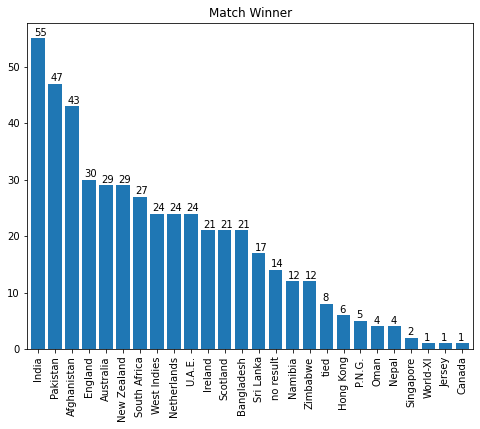

In [40]:
teams=['South Africa', 'Bangladesh', 'Pakistan','England','Afghanistan', 'Australia',
            'New Zealand','India','U.A.E.','Namibia','Netherlands','Sri Lanka','Ireland','Scotland','West Indies','Zimbabwe']
t=pd.Series(teams)
# finding the frequency of toss winners and the match winners to correlate
temp_toss_winner=pd.DataFrame()
temp_toss_winner['Team']=t.values
temp_match_winner=pd.DataFrame()
temp_match_winner['Team']=t.values

#Caluclating toss_winning and match winning frequency of each team
temp_toss_winner['Count'] = temp_toss_winner['Team'].map(df['Toss'].value_counts())
temp_match_winner['Count']=temp_match_winner['Team'].map(df['Winner'].value_counts())

plt.subplots(figsize=(8,6))
ax=df['Toss'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))
plt.title("Toss Winner")
plt.show()

plt.subplots(figsize=(8,6))
ax=df['Winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))
plt.title("Match Winner")
plt.show()

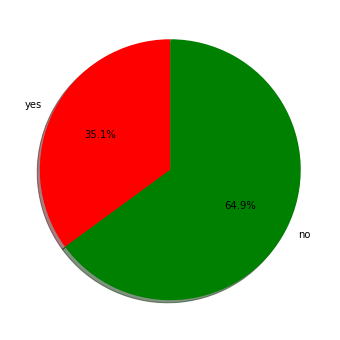

In [41]:
df_toss=df[df['Toss']==df['Winner']]
slices=[len(df_toss),(len(df)-len(df_toss))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [42]:
plt.subplots(figsize=(10,15))
ax = df['Ground'].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Counts')
ax.set_ylabel('Grounds')
plt.show()

In [43]:
plt.subplots(figsize=(10,15))
ax = df['Ground'].value_counts().nsmallest(50).sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Counts')
ax.set_ylabel('Grounds')
plt.show()

In [44]:
#removing unnecessary columns

In [45]:
df.drop(["Unnamed: 0","Unnamed: 0.1","Scorecard","Margin","Match Date","batting_first_team","batting_second_team"],inplace=True,axis=1)

In [46]:
df.head()

Team 1       Team 2        Winner        Ground          Toss Target  \
0  South Africa  West Indies   West Indies     Cape Town  South Africa    166   
1  South Africa  West Indies   West Indies  Johannesburg   West Indies    232   
2  South Africa  West Indies  South Africa        Durban   West Indies    196   
3    Bangladesh     Pakistan    Bangladesh        Mirpur      Pakistan    142   
4      Pakistan     Zimbabwe      Pakistan        Lahore      Zimbabwe    173   

                                       Total_Players  
0  ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...  
1  ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...  
2  ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...  
3  ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...  
4  ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 706
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team 1         482 non-null    object
 1   Team 2         482 non-null    object
 2   Winner         482 non-null    object
 3   Ground         482 non-null    object
 4   Toss           396 non-null    object
 5   Target         449 non-null    object
 6   Total_Players  482 non-null    object
dtypes: object(7)
memory usage: 30.1+ KB


In [48]:
df.dropna(inplace=True)

In [49]:
new_df = pd.get_dummies(df, columns=["Team 1","Team 2","Winner","Ground","Toss",])

In [50]:
new_df

Target                                      Total_Players  \
0      166  ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...   
1      232  ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...   
2      196  ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...   
3      142  ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...   
4      173  ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...   
..     ...                                                ...   
702    195  ['Matthew Wade', "D'Arcy Short", 'Steven Smith...   
703    187  ['Matthew Wade', 'Aaron Finch', 'Steven Smith'...   
704    154  ['Mohammad Rizwan', 'Abdullah Shafique', 'Haid...   
705    164  ['Mohammad Rizwan', 'Haider Ali', 'Abdullah Sh...   
706    174  ['Martin Guptill', 'Tim Seifert', 'Kane Willia...   

     Team 1_Afghanistan  Team 1_Australia  Team 1_Bangladesh  Team 1_Botswana  \
0                     0                 0                  0                0   
1                     0                 0                  0                0   
2                     0                 0                  0                0   
3                     0                 0                  1                0   
4                     0                 0                  0                0   
..                  ...               ...                ...              ...   
702                   0                 1                  0                0   
703                   0                 1                  0                0   
704                   0                 0                  0                0   
705                   0                 0                  0                0   
706                   0                 0                  0                0   

     Team 1_England  Team 1_Ghana  Team 1_Hong Kong  Team 1_ICC World XI  ...  \
0                 0             0                 0                    0  ...   
1                 0             0                 0                    0  ...   
2                 0             0                 0                    0  ...   
3                 0             0                 0                    0  ...   
4                 0             0                 0                    0  ...   
..              ...           ...               ...                  ...  ...   
702               0             0                 0                    0  ...   
703               0             0                 0                    0  ...   
704               0             0                 0                    0  ...   
705               0             0                 0                    0  ...   
706               0             0                 0                    0  ...   

     Toss_Oman  Toss_Pakistan  Toss_Papua New Guinea  Toss_Scotland  \
0            0              0                      0              0   
1            0              0                      0              0   
2            0              0                      0              0   
3            0              1                      0              0   
4            0              0                      0              0   
..         ...            ...                    ...            ...   
702          0              0                      0              0   
703          0              0                      0              0   
704          0              1                      0              0   
705          0              1                      0              0   
706          0              1                      0              0   

     Toss_South Africa  Toss_Sri Lanka  Toss_United Arab Emirates  \
0                    1               0                          0   
1                    0               0                          0   
2                    0               0                          0   
3                    0               0                          0   
4                    0               0                          0   
..        

In [51]:
new_df.reset_index(inplace=True)

In [52]:
new_df

index Target                                      Total_Players  \
0        0    166  ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...   
1        1    232  ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...   
2        2    196  ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...   
3        3    142  ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...   
4        4    173  ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...   
..     ...    ...                                                ...   
370    702    195  ['Matthew Wade', "D'Arcy Short", 'Steven Smith...   
371    703    187  ['Matthew Wade', 'Aaron Finch', 'Steven Smith'...   
372    704    154  ['Mohammad Rizwan', 'Abdullah Shafique', 'Haid...   
373    705    164  ['Mohammad Rizwan', 'Haider Ali', 'Abdullah Sh...   
374    706    174  ['Martin Guptill', 'Tim Seifert', 'Kane Willia...   

     Team 1_Afghanistan  Team 1_Australia  Team 1_Bangladesh  Team 1_Botswana  \
0                     0                 0                  0                0   
1                     0                 0                  0                0   
2                     0                 0                  0                0   
3                     0                 0                  1                0   
4                     0                 0                  0                0   
..                  ...               ...                ...              ...   
370                   0                 1                  0                0   
371                   0                 1                  0                0   
372                   0                 0                  0                0   
373                   0                 0                  0                0   
374                   0                 0                  0                0   

     Team 1_England  Team 1_Ghana  Team 1_Hong Kong  ...  Toss_Oman  \
0                 0             0                 0  ...          0   
1                 0             0                 0  ...          0   
2                 0             0                 0  ...          0   
3                 0             0                 0  ...          0   
4                 0             0                 0  ...          0   
..              ...           ...               ...  ...        ...   
370               0             0                 0  ...          0   
371               0             0                 0  ...          0   
372               0             0                 0  ...          0   
373               0             0                 0  ...          0   
374               0             0                 0  ...          0   

     Toss_Pakistan  Toss_Papua New Guinea  Toss_Scotland  Toss_South Africa  \
0                0                      0              0                  1   
1                0                      0              0                  0   
2                0                      0              0                  0   
3                1                      0              0                  0   
4                0                      0              0                  0   
..             ...                    ...            ...                ...   
370              0                      0              0                  0   
371              0                      0              0                  0   
372              1                      0              0                  0   
373              1                      0              0                  0   
374              1                      0              0                  0   

     Toss_Sri Lanka  Toss_United Arab Emirates  Toss_West Indies  \
0                 0                          0                 0   
1                 0                          0                 1   
2                 0                          0                 1   
3                 0                          0                 0   
4                 0      

In [53]:
new_df.drop("index",axis=1,inplace=True)

In [54]:
new_df

Target                                      Total_Players  \
0      166  ['Reeza Hendricks', 'Morne van Wyk', 'Faf du P...   
1      232  ['Rilee Rossouw', 'Morne van Wyk', 'Faf du Ple...   
2      196  ['Morne van Wyk', 'Reeza Hendricks', 'David Wi...   
3      142  ['Mukhtar Ahmed', 'Ahmed Shehzad', 'Shahid Afr...   
4      173  ['Hamilton Masakadza', 'Vusi Sibanda', 'Charle...   
..     ...                                                ...   
370    195  ['Matthew Wade', "D'Arcy Short", 'Steven Smith...   
371    187  ['Matthew Wade', 'Aaron Finch', 'Steven Smith'...   
372    154  ['Mohammad Rizwan', 'Abdullah Shafique', 'Haid...   
373    164  ['Mohammad Rizwan', 'Haider Ali', 'Abdullah Sh...   
374    174  ['Martin Guptill', 'Tim Seifert', 'Kane Willia...   

     Team 1_Afghanistan  Team 1_Australia  Team 1_Bangladesh  Team 1_Botswana  \
0                     0                 0                  0                0   
1                     0                 0                  0                0   
2                     0                 0                  0                0   
3                     0                 0                  1                0   
4                     0                 0                  0                0   
..                  ...               ...                ...              ...   
370                   0                 1                  0                0   
371                   0                 1                  0                0   
372                   0                 0                  0                0   
373                   0                 0                  0                0   
374                   0                 0                  0                0   

     Team 1_England  Team 1_Ghana  Team 1_Hong Kong  Team 1_ICC World XI  ...  \
0                 0             0                 0                    0  ...   
1                 0             0                 0                    0  ...   
2                 0             0                 0                    0  ...   
3                 0             0                 0                    0  ...   
4                 0             0                 0                    0  ...   
..              ...           ...               ...                  ...  ...   
370               0             0                 0                    0  ...   
371               0             0                 0                    0  ...   
372               0             0                 0                    0  ...   
373               0             0                 0                    0  ...   
374               0             0                 0                    0  ...   

     Toss_Oman  Toss_Pakistan  Toss_Papua New Guinea  Toss_Scotland  \
0            0              0                      0              0   
1            0              0                      0              0   
2            0              0                      0              0   
3            0              1                      0              0   
4            0              0                      0              0   
..         ...            ...                    ...            ...   
370          0              0                      0              0   
371          0              0                      0              0   
372          0              1                      0              0   
373          0              1                      0              0   
374          0              1                      0              0   

     Toss_South Africa  Toss_Sri Lanka  Toss_United Arab Emirates  \
0                    1               0                          0   
1                    0               0                          0   
2                    0               0                          0   
3                    0               0                          0   
4                    0               0                          0   
..        

In [55]:
new_df.drop("Total_Players",axis=1,inplace=True)

In [ ]:
new_df["Total_Players"] = lst

In [ ]:
#pd.get_dummies(new_df["Total_Players"][0])

In [ ]:
c = new_df["Total_Players"].apply(lambda x : pd.get_dummies(x))

In [ ]:
c